# Computer Simulations

This section touches on some basic concepts:
- Pseudorandom Number Generation
- Monte Carlo Method
- Kernel Density Estimation

### Pseudorandom Number Generation

A pseudorandom number sequence is produced by a deterministic algorithm such that the long run stats of the numbers are intended to match those of an appropriate random variable. E.g. most programming languages like MATLAB and python have their own pseudorandom number generation functions like rand and randn. 

All stochastic computations hereby will use random.uniform and random.normal functions in numpy to generate sequences from uniform and normal distributions. 

Setting a seed in most languages allows to make the computation reproducible.

### Monte Carlo Method

Let $X$ be a random variable whose expected value $E[X]$ is to be estiamted. If we have a method of generating samples from the distribution of $X$, the strong law of large numbers tells us that repeated samples can be averaged to asymptotically estimate the expected value; referred to as sample mean. From central limit theorem, we know that the difference between this approximation and the true mean would depend on the variance of $X$.

This is the foundation of monte carlo method. 

### Kernel Density Estimation

The frequency interpretation of probablity gives a method of reconstructing the distribution of $X$ from a collection of samples. For a continuous rv, we can choose a large interval on the x-axis and divide it into bins, and then approximate the probablity density function as a piecewise constant within each bin. 

### Example Simulation: Make a Bernoulli(p) Distribution using the random.uniform function

(array([2.77, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 7.23]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

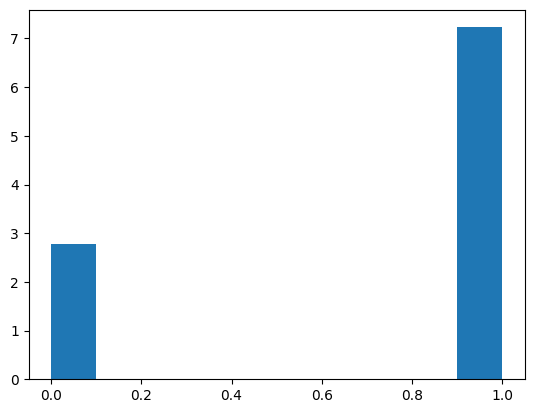

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli(p, n=1000):

    X = []
    for i in range(0, n):
        if np.random.uniform(0, 1) <= p:
            X.append(1)
        else:
            X.append(0)
    return X

plt.hist(bernoulli(p=0.7), density=True)

# Brownian Motion

Brownian motion is defined as a random variable that changes with time. 

**Def:** A stochastic process $W(t)$ for $t \in [0, T]$ is called Brownian or a standard Wiener process over $[0, T]$ if it satisfies the following three conditions:

- $W(0) = 0$
- For $0 \leq s < t \leq T$, the random variable given by the increment $W(t) - W(s)$ is $\mathcal{N}(0, t-s)$ i.e. $W(t) - W(s) \sim \sqrt{(t-s)}\mathcal{N}(0, 1)$
- For $0 \leq s \leq t \leq u \leq v \leq T$, the increments $W(t) - W(s)$ and $W(v) - W(u)$ are independent.

In simple words:
$W(t)$ is a random variable, equal to zero at time 0. The evolution of the variable between two time values depends only on the length of the interval i.e. it has stationary increments which have a normal distribution with mean zero and variance equal to the length. And finally, the evolution of the variable over any interval is independent of evolution over any other non overlapping interval i.e. it has independent increments. 

### Simulate Brownian Motion

0.05202689345566072

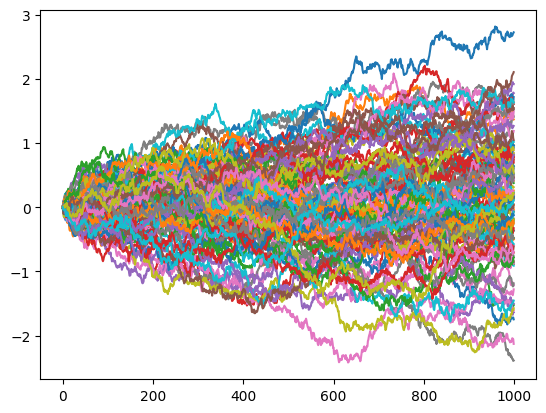

In [112]:
def simulate_brownian(T=1, N=1000, paths=100):

    dt = T/N
    sims = []
    for _ in range(paths):
        W = np.zeros(N)
        for i in range(1, N):
            noise = np.random.normal(0, 1)
            W[i] = W[i-1] + np.sqrt(dt)*noise
        sims.append(np.array(W))

    return np.array(sims)

x = simulate_brownian()
plt.plot(x.T)
# plt.xticks([])
# plt.yticks([])
# plt.grid(False)
# plt.box(False)
# plt.savefig('a.png', transparent=True, bbox_inches='tight')

np.mean(x)

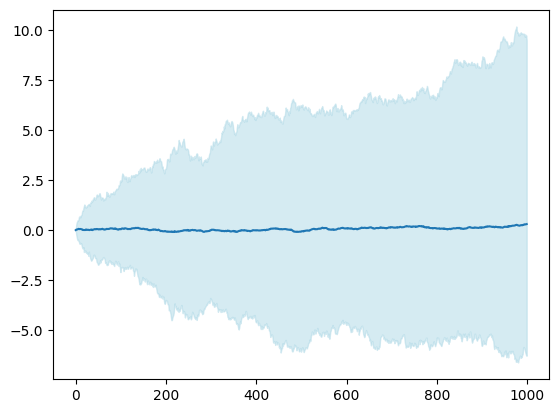

In [104]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_brownian(T=10, N=1000, paths=1):
    dt = T / N
    sims = []
    for _ in range(paths):
        W = np.zeros(N)
        for i in range(1, N):
            noise = np.random.normal(0, 1)
            W[i] = W[i - 1] + np.sqrt(dt) * noise
        sims.append(np.array(W))

    return np.array(sims)

# Simulate multiple Brownian motion paths
paths = 100  # Number of paths
x = simulate_brownian(paths=paths)

# Calculate average, minimum, and maximum at each time step
mean_path = np.mean(x, axis=0)
min_path = np.min(x, axis=0)
max_path = np.max(x, axis=0)

# Plotting the average and shaded area between minimum and maximum
plt.plot(mean_path, label='Average Path')
plt.fill_between(range(x.shape[1]), min_path, max_path, color='lightblue', alpha=0.5)
plt.show()

Filling in a brownian path cannot just be done with $W(t+1/2) = 1/2 (W(t+1) + W(t))$ because of the three conditions of Brownian-ness. Hence, it has to be done the following way:

$$ W_{i + \frac{1}{2}} = \frac{1}{2}(W_i + W_{i+1}) + \frac{1}{2}\sqrt{dt}\zeta_i$$

where $\zeta_i \sim \mathcal{N}(0, 1)$

### Scaling Property of Brownians

For $W(t)$ a path of Brownian motion over $[0, T]$, for any fixed $c>0$, 
$$V(t) = \frac{1}{c}W(c^2 t)$$
is a Brownian path over $[0, c^2T]$

Brownian motion has a fractal-like property, are non-differentiable and have an unbounded variation.

### Fourier Series Representaion

Brownian motion is also modelled using a Fourier series specifically in the $[0, 2\pi]$ interval. 

$$ W(t) = Z_0 (t/\sqrt{2\pi}) + (2/\sqrt{2\pi})\sum_{n=1}^{\infty} Z_n (\sin{(0.5*n*t)} / n)$$

where $Z_i$ are i.i.d and taken from $\mathcal{N}(0, 1)$.

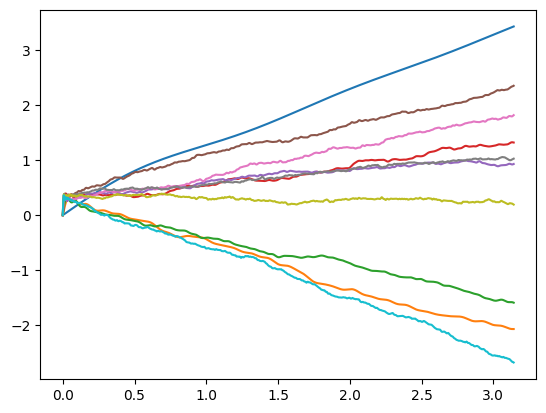

In [88]:
import numpy as np

all = []
for n in range(10, 1000, 100):

    T = np.pi
    N = T*1000
    t = np.linspace(0, T, int(N), endpoint=True)
    W = np.random.normal(0, 1)*(t / np.sqrt(2*np.pi))

    series = np.zeros_like(W)

    for i in range(1, n):
        series = series + (np.random.uniform(0, 1)*np.sin(0.5*i*t)/i)

    W = W + (series/np.sqrt(2*np.pi))
    all.append(W)

plt.plot(t, np.array(all).T)
plt.show()

### White Noise Interpretation

Although Brownian paths are not differentiable, many mathematicians find it useful to assume that they are, and call the derivative $\frac{dW}{dt} = \eta(t)$ "white noise". In a white noise function, all frequencies have equal strength in the autocorrelation function.

# Stochastic Integrals

To be able to solve the stochastic diff equation, we need to know how to integrate it stochastically "wrt Brownian motion". An integral similar to the Riemann sum can be defined for stochastic paths as well, but in the limit of $\delta t \xrightarrow{} \infty$, the integral is senstive to the point used to define the height of the rectangles. 

Taking a left-end point version of the Riemann sum leads to an *Ito integral* $\int W(t)dW(t)$, while a midpoint approach leads to a *Stratanovich integral* $\int W(t) \circ dW(t)$. 

### Properties of Ito

At time $t$, the integrand, say $h(t)$, must be independent of ${W(s)}$ for $s > t$. This means that the integrand is non-anticipative.

Using the Riemann definition of Ito and the expectation of it, leads to the conclusion that the expectation of the integral is 0 in the limit and for all values of $\delta t$. This condition is known as the martingale property of the Ito integral, which makes it amenable to many of the stochastic process tools. Generally, the word martingale refers to a stochastic process whose expected future value is independent of time. 

Taking an expectation of the square of the Riemann sum leads to the isometry property of Ito integral. 
$$ E[(\int_0^T h(t)dW(t))^2] = E[(\int_0^T h(t)^2 dt)] $$
This isometric identity allows the conversion from stochastic to standard integral, and also leads to the "$dW^2 = dt$" relation.

# Stochastic Differential Equations

Given functions $f$ and $g$, we say that a stochastic process $X(t)$ is the solution of an SDE
$$ dX(t) = f(X(t))dt + g(X(t))dW(t) $$
if it solves the integral equation
$$ X(t) - X(0) = \int_0^t f(X(s))ds + \int_0^t g(X(s))dW(s) $$

The second term on right is the Ito stochastic integral as discussed earlier. It is also common to refer to $f$ as the drift and $g$ as the diffusion coefficients. 

A simple and widely occurring SDE is used for stock price evaluation in the Black-Scholes theory for option evaluation, which uses a linear-multiplicative noise case.
$$dX(t) = \mu X(t)dt + \sigma X(t)dW(t) $$
Since the stochastic term models the fluctuations, $\sigma$ is called the volatility and $\mu$ is the expected growth rate. This is solved as the following, and sometimes referred to as the geometric brownian motion:
$$X(t) = X(0)\exp{((\mu - \frac{1}{2}\sigma^2 )t + \sigma W(t))}$$

## Other Examples of SDEs

### Asset Prices and Interest Rates
Represented by a mean-reverting square root process:
$$dX(t) = \lambda (\mu - X(t))dt + \sigma \sqrt{X(t)}dW(t)$$

This is generally named after Cox, Ingersoll and Ross. Typically used to model asset prices and volatilities. Removing the square root gives the Vasicek interest model, which gives the famous mean-reverting Ornstein Uhlenbeck process. 

### Ait-Sahlia Interest Rate Model

### Portfolio Theory
$$dX = -\alpha \text{sgn}{X} + \sigma dW$$

### Population Dynamics
$$dW = rX(k - X)dt + \beta X dW$$
Setting $\beta=0$ gives the standard logistic model. 


## Existence of Solutions

There are many strict restrictions on $f$ and $g$ which guarantee the existence and uniqueness of a solution. Most of those requirements are based on $f$ and $g$ being globally Lipschitz. 

**Strong** and **weak** solutions are described in relevance to whether the solution exists for all Brownian paths or for some/one specific path. 

# The Ito Formula

The ito formula is the stochastic version of the chain rule in deterministic derivatives. Let $X(t)$ be the solution to the stochastic equation $dX = f(X)dt + g(X)dW$, and let a function $v(X)$. One might assume that the chain rule would be $ dv(x) = (dv/dX)dX $ such that
$$ dv(X) = v^{'}(X)f(X)dt + g(X)dW $$
But this turns out to be false, and an extra term arises
$$ dv(X) = v^{'}(X(t))dX + \frac{1}{2}g(X)^2 v^{''}dt $$

Note: It is correct in the Stratanovich framework, but not in Ito calculus.

This leads to
$$ dv = f(X)v^{'}dt + \frac{1}{2}g(X)^2 v^{''}dt + g(X)v^{'}dW $$
This is a special case of the Ito formula.

# Stratanovich vs Ito

#### TBA

# Euler-Maruyama

EM is the most simplistic numerical method used for integrating an SDE. Let an SDE of the form
$$dX = f(X)dt + g(X)dW \text{, in the interval } 0 \leq t \leq T \text{ with $X(0)$ given}$$

For a stepsize $\Delta t = T/N$ for some integer $N$, 
$$ X_{n+1} = X_n + \Delta t f(X_n) + \Delta W_n g(X_n) $$
where $\Delta W_n = W_{n+1} - W_n$ is a Brownian path increment.

It's clear that EM uses the left-end point technique and hence is consistent with the Ito interpretation.

### Weak Convergence


A weak error is the measure of how well the numerical scheme's expectation approximates the expectation of the SDE. The weak error is written as
$$\epsilon^{weak} = sup{(E[\phi(X_n)] - E[\phi(X(t_n))])}$$

A method converges weakly if error approaches 0 with $\Delta t$ approaching zero.

Further, we say that the weak convergence has order $p$, if $\epsilon^{weak} \leq K\Delta t^p$.

EM converges with weak order 1.

### Strong Convergence

While weak convergence measures error of the means, strong convergence looks at mean of the errors. 
$$\epsilon^{str} = E[ |X_n - X(t_n)| ] $$

The method converges strongly if the error approaches 0 and discretization size approaches 0. 

We say that the strong convergence has order $p$, if $\epsilon^{str} \leq K\Delta t^p$.

EM converges with strong order 1/2.

Strong convergence and pathwise errors are more important when developing monte carlo methods.

# Implicit Methods and Numerical Stability

It is known from deterministic analysis that Euler is inferior to many implicit schemes. Hence, let's look at an important implicit numerical schemes for SDEs. 

### Stochastic $\theta$ method

The numerical scheme is 
$$X_{n+1}  = X_n + (1-\theta)\Delta t f(X_n) + \theta \Delta t f(X_{n+1}) + \Delta W_n g(X_n) $$

This is implicit and needs to be solved iteratively.

$\theta = 1 \text{ and } \theta = 1/2$ are the trapezoidal and backward euler methods respectively.

For $0 < \theta < 1/2$, the scheme has a finite range of stability i.e. it's conditionally stable. For $\theta = 1/2$, the scheme is unconditionally stable. For $1/2 < \theta < 1$, the scheme is overstable i.e. it is stable for stable SDEs but may also be stable for unstable SDEs.

# Mean Exit Times

Mean exit times is an important concept in stochastic systems. 

A simple calculation can be done by running a Monte Carlo simulation for your SDE with the same initial conditions, and keeping track of the time step in each where the solution $X$ exits a predefined interval $(a, b)$. At the end of the monte carlo simulation, we average the time step found in each path. 

However, in this method, we run the risk of missing the exit time if the solution exits the bounds and reenters withing $(t_n, t_{n+1})$.

### Converting to ODE
Under appropriate conditions, the mean exit time problem may also be formulated as an ODE. Letting $u(x)$ denote the mean exit time when $X_0 = x$, an ODE can be formulated as 
$$ \frac{1}{2}g(X)^2 \frac{d^2 u}{dx^2} + f(x)\frac{du}{dx} = -1 $$
with $u(a) = u(b) = 0$

# Exotic Options

SDEs are a standard tool for modeling financial quantities such as options or derivatives. The goal of computing the expected payoff of an option arising naturally in such scenarios. 

Let $X(t)$ denote the value of an asset at time $t$, e.g. the price of a stock share. 

A financial option is an agreement between two parties: the writer and the holder. 

The agreement, made today at $t=0$, says that at a fixed time $T$ in future known as expiry date, the writer will payoff the holder. This payoff is determined by the behaviour of the asset over interval $[0, T]$. 

Options are much more popular than the actual trade of stocks / underlying assets. 

#### TBA

# Steady States

The concepts of steady-states in deterministic systems, and more precisely locally and globally attractive steady states, extends to stochastic equations. Any point $x^{*}$ such that $f(x^{*}) = g(x^{*}) = 0$, is a fixed point of the Ito SDE. 

Since $X(t)$ is an RV, more general scenarios are possible. We can imagine it being characterized by a probability density function $p(x,t)$, such that the integral of it from $a$ to $b$ gives the probabliity of $X$ being between those values. 

Under appropriate conditions, $p$ satisfies the PDE called Fokker Planck forward PDE:
$$ \frac{\partial p}{\partial t} + \frac{\partial f(x)p}{\partial x} - \frac{1}{2}\frac{\partial^2 g^{2} p}{\partial x^{2}} = 0$$

If the solution approaches a time-invariant limit as $t \xrightarrow{} \infty$, $p$ is called the steady state distribution. It is given by setting the first time which is the time-derivative equal to 0. 

The steady state distribution can be computed by running monte-carlo simulations and generating a kernel density with the final values of each path.

The sources of error in this are:

- Errors from following SDE paths approximately with a numerical method. 
- Errors from approximating a KDE by a histogram.
- Errors from approximating long-term behaviour at a large value T.

# Multilevel Monte Carlo

Now, although Monte Carlo is useful, it is computationally expensive. Hence, the multilevel MC approach was introduced. The core idea is to combine simulations at multiple levels of accuracy to improve efficiency. Instead of performing all simulations at the finest level, we compute some at that level and more at coarser levels. The expectiation is then computed as a telescoping sum

$$E[X_L] = E[X_0] + \sum E[X_l - X_{l-1}]$$
where $X_l$ represents the approximation of $X$ at discretization level $l$ such that higher $l$ is higher discretization.

### Steps of MLMC

- Choose a sequence of levels $L$ where each $l$ corresponds to a finer discretization. Let $h_l$ be the time step.
- At $l=0$, perform a large number of simulations to estimate $E[X_0]$. 
- For each $l = 1, 2, \cdots, L$, estimate the difference $E[X_l - X_{l-1}]$ by simulating both $X_l$ and $X_{l-1}$ with the same underlying randomness (coupled simulations).
- Compute the expectations. 

This works due to reduced variance in differences at higher levels. 

# Jumps

Many application areas involve processes that may undergo abrupt changes. The discontinuous paths produced by a poisson process form a useful tool for incorporating jumps into an SDE model. 

## Poisson Process

Like Brownian motion was used to set up the Ito integral, a Poisson process is needed to incorporate jumps. 

**Recall:** A poisson process $N(t)$ with intensity $\lambda$ follows the following conditions
- $N(0)=0$
- For $0 \leq s < t \leq T$, $N(t)-N(s)$ is a poisson RV with $\lambda (t-s)$. 
- For $0 \leq s \leq t \leq u \leq v \leq T$, $N(t) - N(s)$ and $N(v)-N(u)$ are independent.

We note that $X(t)$ is a poisson RV with parameter $\lambda t$, then $E[N] = \lambda t$ and $var(N) = \lambda t$.

2.274

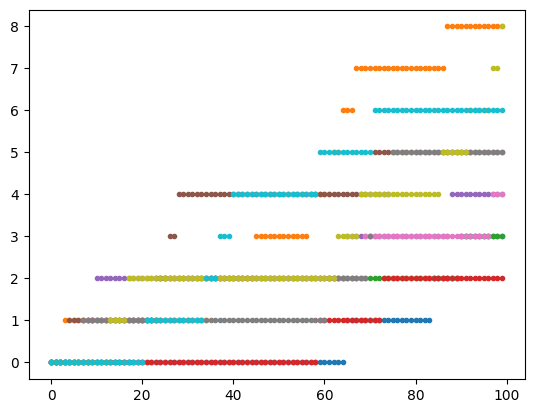

In [22]:
import numpy as np
import matplotlib.pyplot as plt
def simulate_poisson(lambda_=5, T=1, N=100, paths=100):

    dt = T/N
    sims = []
    for _ in range(paths):
        W = np.zeros(N)
        for i in range(1, N):
            noise = poisson_increments(lambda_, dt)
            W[i] = W[i-1] + noise
        sims.append(np.array(W))

    return np.array(sims)

def poisson_increments(lambda_, dt):
    p = np.exp(-lambda_*dt)
    F = p
    noise = 0
    unif = np.random.uniform(0, 1)
    while unif > F:
        noise = noise + 1
        p = p*lambda_*dt/noise
        F = F+p

    return noise

x = simulate_poisson(paths=10)
plt.plot(x.T, '.')
# plt.xticks([])
# plt.yticks([])
# plt.grid(False)
# plt.box(False)
# plt.savefig('a.png', transparent=True, bbox_inches='tight')

np.mean(x)

### General Jump SDE

For analytical purposes, it is convenient to include the jump process in the SDE formulation. 

$$dX = f(X) dt + g(X) dW + h(X(t^{-})) dN$$
Here $h$ is the jump coefficient. The integral of the third term is a stochastic integral with respect to a Poisson process. This SDE acts like a standard SDE between jumps, and at jump point, it undergoes a jump of magnitude proportional to the value of the jump coefficient evaluated at the current solution. 

An EM scheme for this looks like
$$X_{n+1} = X_{n} + \Delta t f(X_n) + \Delta W_n g(X_n) + \Delta N_n h(X_n) $$
Here, $\Delta N_n = N(t_{n+1}) - N(t_n)$ is the increment in the poisson process. 

# Higher Order Methods

EM and stochastic $\theta$ methods are low-order schemes in the sense of weak and strong convergence. Now, we discuss how higher order schemes may be derived. Although for practical applications, the EM method and low order schemes are very sensible and effective, especially when combines with MLMC. 

Let a non-autonomous SDE
$$dX = f(t, X)dt + g(t, X)dW$$

## EM
The EM method methods
$$X_{n+1} = X_n + \Delta t f(t_n, X_n) + \Delta W_n g(t_n, X_n) $$
This method is consistent with Ito calculus and converges with strong order 1/2 and weak order 1.

## Milstein Method

We can derive consistent numerical methods of high order by truncating appropriate stochastic Taylor expansions. The expansions are derived through iterated application of stochastic chain rule (ito formula).

$$ X_{n+1} = X_n + \Delta t f(t_n, X_n) + \Delta W_n g(t_n, X_n) + L^{1} g(t_n, X(t_n)) \int_{t_n}^{t_{n+1}} \int_{t_n}^s dW(u)dW(s) $$

which has a strong order 1 and weak order 1. 

The double integral at the end can be integrated as $\frac{1}{2} ((\Delta W_n)^2 - \Delta t)$.

## Milstein with Several Brownian Motions

Similar methods as above can be derived using $L^2$, $L^3$ and so on.